In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# Load the CSV file
file_path = 'D:\\WeekThree\\data\\MachineLearningRating_v3.csv'
data = pd.read_csv(file_path, low_memory=False)
total_rows, total_columns = data.shape
print(f"Total number of rows: {total_rows}")
print(f"Total number of columns: {total_columns}")
# Print the columns of the DataFrame
print(data.columns)

Total number of rows: 1000098
Total number of columns: 52
Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Drop columns with excessive missing values
columns_to_drop = ['CrossBorder', 'NumberOfVehiclesInFleet']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]  # Ensure the columns exist
data.drop(columns=columns_to_drop, inplace=True)

# Fill missing values for numerical columns
data['Cylinders'] = data['Cylinders'].fillna(data['Cylinders'].median())
data['CustomValueEstimate'] = data['CustomValueEstimate'].fillna(data['CustomValueEstimate'].median())

# Fill missing values for categorical columns
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['VehicleType'] = data['VehicleType'].fillna('Unknown')  # Example default value

# Create a flag for missing values
data['Bank_missing'] = data['Bank'].isnull().astype(int)

# Optionally, drop rows with critical missing values
data.dropna(subset=['Bank', 'AccountType'], inplace=True)

# Create the "data" folder if it doesn't exist
data_folder = 'data'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)
    print(f"Created folder: {data_folder}")

# Save the cleaned DataFrame
data.to_csv('cleaned_file.csv', index=False)

# Print total number of rows and columns
total_rows, total_columns = data.shape
print(f"Total number of rows: {total_rows}")
print(f"Total number of columns: {total_columns}")

Missing values in each column:
MaritalStatus         8259
mmcode                 552
make                   552
Model                  552
cubiccapacity          552
kilowatts              552
bodytype               552
NumberOfDoors          552
VehicleIntroDate       552
NewVehicle          129121
WrittenOff          549787
Rebuilt             549787
Converted           549787
dtype: int64
Total number of rows: 854137
Total number of columns: 51


In [10]:
# Calculate descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)

# Variability for Totalpremium and Totalclaims Column
variability = data[['TotalPremium', 'TotalClaims']].var()
print(variability)
# Data Structure
print(data.dtypes)

       UnderwrittenCoverID       PolicyID     PostalCode        mmcode  \
count        854137.000000  854137.000000  854137.000000  8.535850e+05   
mean         104221.126326    7893.972230    3067.435594  5.456773e+07   
std           63284.340184    5316.523614    2665.208637  1.398915e+07   
min               1.000000      14.000000       1.000000  4.042080e+06   
25%           54520.000000    4361.000000    1022.000000  6.005692e+07   
50%           94913.000000    7074.000000    2000.000000  6.005841e+07   
75%          138944.000000   11116.000000    4340.000000  6.005842e+07   
max          301133.000000   23241.000000    9870.000000  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count     854137.000000  854137.000000  853585.000000  853585.000000   
mean        2009.971303       4.048633    2450.755760      96.617896   
std            3.313990       0.302771     461.377134      19.717568   
min         1994.000000       0.000000       

In [28]:
# Drop columns with excessive missing values
data.drop(columns=['CrossBorder', 'NumberOfVehiclesInFleet'], inplace=True)

# Fill missing values for numerical columns
data['Cylinders'] = data['Cylinders'].fillna(data['Cylinders'].median())
data['CustomValueEstimate'] = data['CustomValueEstimate'].fillna(data['CustomValueEstimate'].median())

# Fill missing values for categorical columns
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['VehicleType'] = data['VehicleType'].fillna('Unknown')  # Example default value

# Create a flag for missing values
data['Bank_missing'] = data['Bank'].isnull().astype(int)

# Optionally, drop rows with critical missing values
data.dropna(subset=['Bank', 'AccountType'], inplace=True)

# Save the cleaned DataFrame
data.to_csv('cleaned_file.csv', index=False)

KeyError: "['CrossBorder', 'NumberOfVehiclesInFleet'] not found in axis"

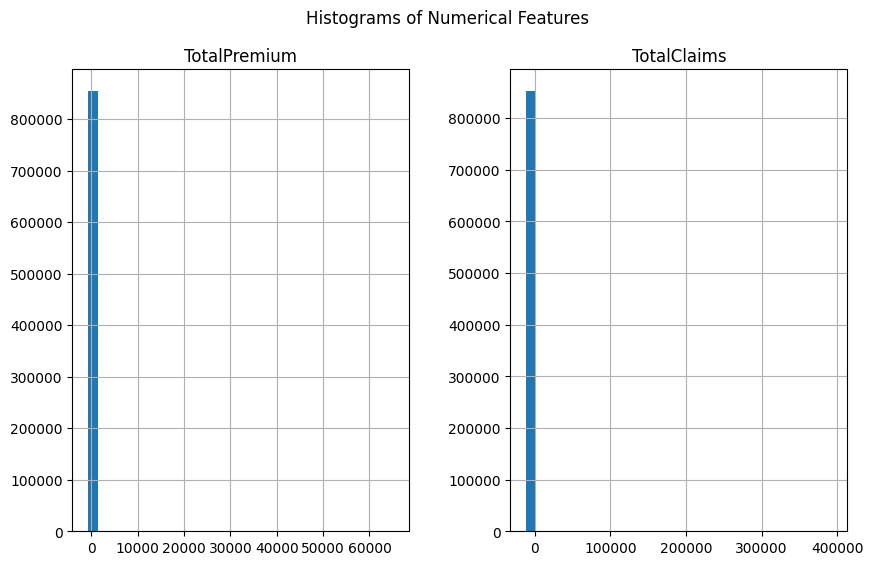

In [11]:
# Histograms for numerical columns
data[['TotalPremium', 'TotalClaims']].hist(bins=30, figsize=(10, 6))
plt.suptitle('Histograms of Numerical Features')
plt.show()

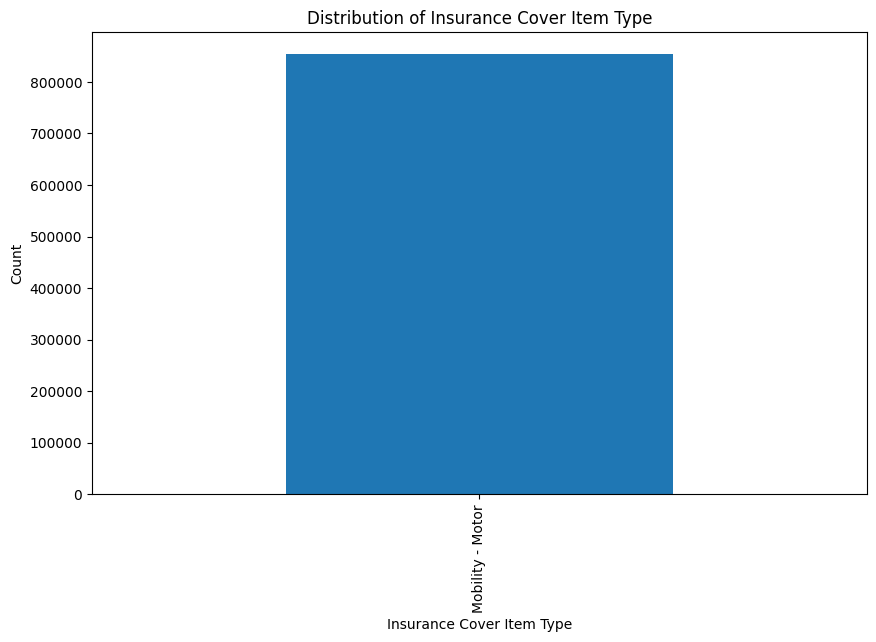

In [12]:
# Bar charts for categorical columns
data['ItemType'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Insurance Cover Item Type')
plt.xlabel('Insurance Cover Item Type')
plt.ylabel('Count')
plt.show()

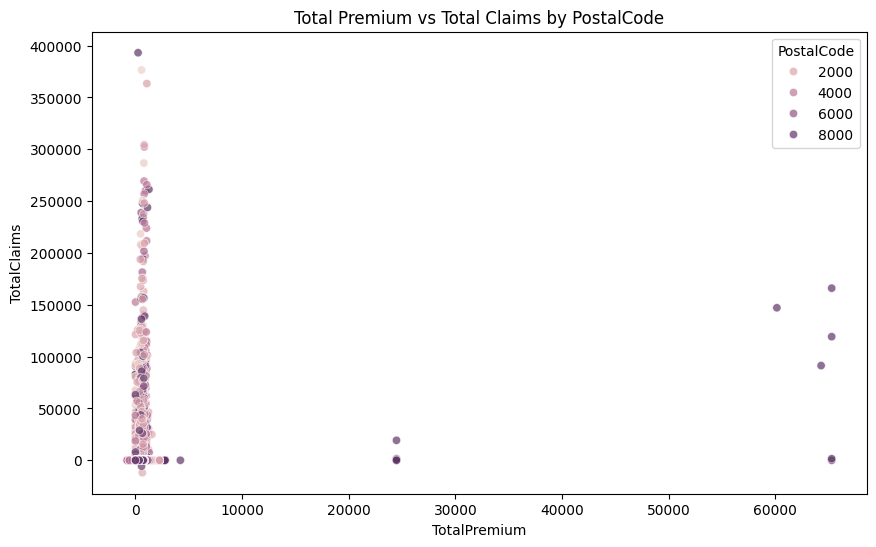

In [13]:
# Scatter plot for TotalPremium vs TotalClaims by ZipCode
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TotalPremium' , y='TotalClaims', hue='PostalCode', alpha=0.7)
plt.title('Total Premium vs Total Claims by PostalCode')
plt.show()

In [14]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

In [15]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '2015-03-01 00:00:00'